In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [179]:
data = pd.read_csv('C:/Users/acer/talkative/종로2020.csv', encoding = 'utf-8', index_col = 0) #데이터셋 삽입
data

,행정구,기준년코드,기준분기코드,당월_매출_금액,총유동인구,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,...,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
684,종로구,2020,1,2.914288e+09,336343,169874,166470,33331,48735,65271,...,53858,54837,32449,50723,53001,50478,51241,50032,41365,39502
685,종로구,2020,2,3.023169e+09,308310,157781,150530,32182,44281,62332,...,50614,51239,29022,46552,47343,48066,48064,47079,36692,34512
686,종로구,2020,3,2.959721e+09,302842,153334,149509,37195,42888,58900,...,48904,49606,28527,45637,47289,46476,47419,46609,35765,33648
687,종로구,2020,4,3.003260e+09,300188,151713,148474,37781,41479,57348,...,49609,49059,28046,46328,47520,47456,45328,43833,36329,33394
1124,종로구,2020,1,1.246115e+10,162970,98429,64541,5668,21275,23575,...,39556,32597,10622,25494,27140,26256,27208,26361,18675,11835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,종로구,2020,4,3.206545e+09,427117,200492,226626,63361,157831,52545,...,60417,87074,55088,59638,61110,61518,59798,61178,63409,60465
11524,종로구,2020,1,2.568613e+10,1159324,516221,643104,127165,395536,191485,...,208179,321258,147376,155362,161349,166751,166084,169592,177121,163067
11525,종로구,2020,2,2.404843e+10,1091072,493033,598039,114225,382973,179307,...,185614,291194,138948,147346,154072,158096,158449,162941,162711,147457
11526,종로구,2020,3,2.252362e+10,1061286,476507,584778,125664,355135,170676,...,181969,280056,130668,142988,153636,153521,153830,159209,156757,141346


In [164]:
data.dropna(axis=0,inplace=True)

x= data[['총유동인구', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수',
          '시간대_1_유동인구_수', '시간대_2_유동인구_수', '시간대_3_유동인구_수', '시간대_4_유동인구_수', '시간대_5_유동인구_수', '시간대_6_유동인구_수',
         '월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']]
y = data[['당월_매출_금액']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

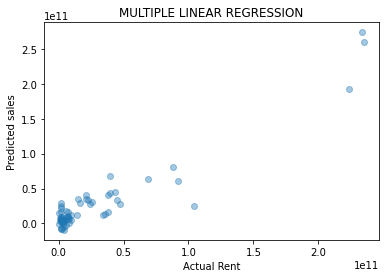

In [165]:
mlr = LinearRegression() #선형회귀 함수
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4) 
plt.xlabel("Actual Rent")
plt.ylabel("Predicted sales")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [166]:
print(mlr.coef_) #상관계수 확인

print(mlr.score(x_train, y_train)) #예측 정확도

[[-1.49902189e+09 -1.08669963e+09 -1.08687888e+09  5.53617651e+08
   5.53953337e+08  5.53125455e+08  5.55045691e+08  5.54117819e+08
   5.53817915e+08 -4.19509120e+07 -4.28587231e+07 -4.55772175e+07
  -4.01734527e+07 -4.20490628e+07 -4.36409205e+07  2.07274266e+09
   2.07333060e+09  2.07856401e+09  2.07283211e+09  2.07638743e+09
   2.07285431e+09  2.07446986e+09]]
0.7423894658715827


In [167]:
X_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary() #다중선형회귀 모델 분석 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               당월_매출_금액   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              21.58
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.06e-32
Time:                        17:30:29   Log-Likelihood:                         -3606.0
No. Observations:                 145   AIC:                                      7256.
Df Residuals:                     123   BIC:                                      7321.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
총유동인구            -1.029e+09   1.93e+09     -0.533      0.595   -4.85e+09    2.79e+09
남성_유동인구_수        -1.063e+09   1.68e+09     -0.633      0.528   -4.39e+09    2.26e+09
여성_유동인구_수        -1.064e+09   1.68e+09     -0.633      0.528   -4.39e+09    2.26e+09
연령대_10_유동인구_수     3.982e+08   1.09e+09      0.364      0.716   -1.77e+09    2.56e+09
연령대_20_유동인구_수     3.985e+08   1.09e+09      0.364      0.716   -1.77e+09    2.56e+09
연령대_30_유동인구_수     3.975e+08   1.09e+09      0.363      0.717   -1.77e+09    2.56e+09
연령대_40_유동인구_수     3.996e+08   1.09e+09      0.365      0.715   -1.77e+09    2.56e+09
연령대_50_유동인구_수     3.986e+08   1.09e+09      0.364      0.716   -1.77e+09    2.56e+09
연령대_60_이상_유동인구_수  3.983e+08   1.09e+09      0.364      0.716   -1.77e+09    2.56e+09
시간대_1_유동인구_수     -3.492e+08   1.12e+09     -0.313      0.755   -2.56e+09    1.86e+09
시간대_2_유동인구_수       -3.5e+08   1.12e+09     -0.314      0.754   -2.56e+09    1.86e+09
시간대_3_유동인구_수     -3.527e+08   1.12e+09     -0.316      0.753   -2.56e+09    1.86e+09
시간대_4_유동인구_수     -3.473e+08   1.12e+09     -0.311      0.756   -2.56e+09    1.86e+09
시간대_5_유동인구_수     -3.493e+08   1.12e+09     -0.313      0.755   -2.56e+09    1.86e+09
시간대_6_유동인구_수     -3.509e+08   1.12e+09     -0.314      0.754   -2.56e+09    1.86e+09
월요일_유동인구_수        2.041e+09      1e+09      2.039      0.044    5.96e+07    4.02e+09
화요일_유동인구_수        2.043e+09      1e+09      2.040      0.043    6.08e+07    4.02e+09
수요일_유동인구_수        2.048e+09      1e+09      2.045      0.043     6.6e+07    4.03e+09
목요일_유동인구_수        2.042e+09      1e+09      2.041      0.043    6.16e+07    4.02e+09
금요일_유동인구_수        2.045e+09      1e+09      2.042      0.043    6.29e+07    4.03e+09
토요일_유동인구_수        2.042e+09      1e+09      2.040      0.043    6.06e+07    4.02e+09
일요일_유동인구_수        2.044e+09      1e+09      2.042      0.043    6.22e+07    4.03e+09
==============================================================================
Omnibus:                      125.879   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1685.554
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      18.553   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
data1 = pd.read_csv('C:/Users/acer/talkative/강남2020.csv', encoding = 'utf-8', index_col = 0) #데이터셋 삽입
data1

,행정구,기준년코드,기준분기코드,당월_매출_금액,총유동인구,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,...,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
148,강남구,2020,1,1.510000e+11,97812,49384,48428,5940,22545,27379,...,23513,21915,5855,15159,15960,15520,15893,15433,10578,9269
149,강남구,2020,2,1.570000e+11,90544,46022,44522,4560,20323,26443,...,21482,19681,5161,14459,14561,14670,14736,14524,9591,8002
150,강남구,2020,3,1.510000e+11,97662,49322,48340,5557,22263,27809,...,22925,21089,5864,14696,15628,15297,16139,16028,10950,8926
151,강남구,2020,4,1.510000e+11,90836,46313,44523,4351,19931,26440,...,21377,19466,5202,14166,14782,15082,14512,13934,10092,8270
156,강남구,2020,1,2.928247e+09,46885,21585,25299,10070,5070,4800,...,10297,11662,3862,6666,6614,6791,6702,6804,6823,6486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,강남구,2020,4,8.198065e+09,216564,102707,113857,12077,50649,62369,...,39519,42724,20638,30323,33619,33629,32411,32292,30740,23549
11228,강남구,2020,1,7.592187e+09,235231,118468,116762,12191,52738,64822,...,43050,46040,21235,36566,39024,38113,38829,37572,24641,20486
11229,강남구,2020,2,7.117255e+09,191381,96206,95175,10935,40764,52703,...,33810,34428,17748,30535,30572,30867,30550,29907,21129,17824
11230,강남구,2020,3,6.552432e+09,197211,99507,97704,10399,42336,54963,...,35166,35575,18068,31030,31762,31149,32005,31387,21571,18309


In [174]:
data1.dropna(axis=0,inplace=True)

x= data1[['총유동인구', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수',
          '연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수','시간대_1_유동인구_수', '시간대_2_유동인구_수', 
          '시간대_3_유동인구_수', '시간대_4_유동인구_수', '시간대_5_유동인구_수', '시간대_6_유동인구_수','월요일_유동인구_수',
          '화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']]

y = data1[['당월_매출_금액']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

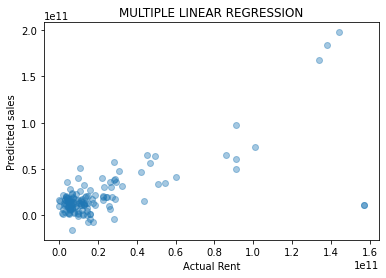

In [175]:
mlr = LinearRegression() #선형회귀 함수
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4) 
plt.xlabel("Actual Rent")
plt.ylabel("Predicted sales")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [176]:
print(mlr.coef_) #상관계수 확인

print(mlr.score(x_train, y_train)) #예측 정확도

[[-2.72477783e+09 -2.88450179e+09 -2.88457994e+09  1.03465278e+09
   1.03472792e+09  1.03460818e+09  1.03432885e+09  1.03490491e+09
   1.03459027e+09  3.01304267e+09  3.01220538e+09  3.01314338e+09
   3.01279523e+09  3.01301772e+09  3.01158806e+09  1.56247251e+09
   1.56223722e+09  1.56154796e+09  1.56157684e+09  1.56199730e+09
   1.56305131e+09  1.56135068e+09]]
0.7043181705330437


In [177]:
X_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary() #다중선형회귀 모델 분석 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               당월_매출_금액   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              46.66
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.35e-83
Time:                        17:31:28   Log-Likelihood:                         -8182.4
No. Observations:                 324   AIC:                                  1.641e+04
Df Residuals:                     302   BIC:                                  1.649e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
총유동인구            -3.544e+09   1.89e+09     -1.871      0.062   -7.27e+09    1.83e+08
남성_유동인구_수        -2.562e+09   1.57e+09     -1.634      0.103   -5.65e+09    5.23e+08
여성_유동인구_수        -2.562e+09   1.57e+09     -1.634      0.103   -5.65e+09    5.23e+08
연령대_10_유동인구_수     1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
연령대_20_유동인구_수     1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
연령대_30_유동인구_수     1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
연령대_40_유동인구_수     1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
연령대_50_유동인구_수     1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
연령대_60_이상_유동인구_수  1.334e+09   1.03e+09      1.292      0.197   -6.98e+08    3.37e+09
시간대_1_유동인구_수      3.084e+09   9.99e+08      3.086      0.002    1.12e+09    5.05e+09
시간대_2_유동인구_수      3.083e+09   9.99e+08      3.086      0.002    1.12e+09    5.05e+09
시간대_3_유동인구_수      3.084e+09   9.99e+08      3.086      0.002    1.12e+09    5.05e+09
시간대_4_유동인구_수      3.084e+09   9.99e+08      3.086      0.002    1.12e+09    5.05e+09
시간대_5_유동인구_수      3.084e+09   9.99e+08      3.086      0.002    1.12e+09    5.05e+09
시간대_6_유동인구_수      3.082e+09   9.99e+08      3.085      0.002    1.12e+09    5.05e+09
월요일_유동인구_수        1.688e+09   1.04e+09      1.619      0.106   -3.64e+08    3.74e+09
화요일_유동인구_수        1.688e+09   1.04e+09      1.619      0.106   -3.64e+08    3.74e+09
수요일_유동인구_수        1.689e+09   1.04e+09      1.619      0.106   -3.64e+08    3.74e+09
목요일_유동인구_수        1.689e+09   1.04e+09      1.619      0.106   -3.64e+08    3.74e+09
금요일_유동인구_수        1.688e+09   1.04e+09      1.619      0.106   -3.64e+08    3.74e+09
토요일_유동인구_수         1.69e+09   1.04e+09      1.620      0.106   -3.63e+08    3.74e+09
일요일_유동인구_수        1.688e+09   1.04e+09      1.619      0.107   -3.64e+08    3.74e+09
==============================================================================
Omnibus:                      285.925   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5886.657
Skew:                           3.662   Prob(JB):                         0.00
Kurtosis:                      22.555   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""